import python modules used in this notebook

In [1]:
import pandas
import numpy
import pickle
import matplotlib.pyplot as plt
import time

create a function that doubles the value of column 'A'

In [2]:
def double_col_a(row):
    row_as_dict=dict(row)
    return row_as_dict['A']*2

To measure how well this scales, run 5 tests for a dataframe with 100 rows, then run 5 tests for a dataframe with 1000 rows, and finally run 5 tests for a dataframe with 10,000 rows.

In [3]:
number_of_tests=5
list_of_row_size=[100, 1000, 10000]

These nested loops implement the scaling experiment

In [4]:
serial_reslts={}
scaling_start=time.time()
for row_count in list_of_row_size:
    test_reslts=[]
    for test_indx in range(number_of_tests):
        df = pandas.DataFrame(
                numpy.random.randint(0,1000,
                                     size=(row_count, 4)), 
                                     columns=list('ABCD'))
        start_time = time.time()
        df['K'] = df.apply(double_col_a,axis=1)
        test_reslts.append(time.time() - start_time)
    serial_reslts[row_count]=sum(test_reslts)/number_of_tests
    print('elapsed time:',time.time() - scaling_start,'for',row_count)

elapsed time: 0.15929126739501953 for 100
elapsed time: 1.015963077545166 for 1000
elapsed time: 9.934395551681519 for 10000


The results from the experiment are stored in a dictionary. I've already averaged the measurements from the 10 runs.

In [5]:
serial_reslts

{100: 0.030289506912231444,
 1000: 0.16997380256652833,
 10000: 1.782315444946289}

Plot the data to see linear scaling. I've included a linear fit of the data points.

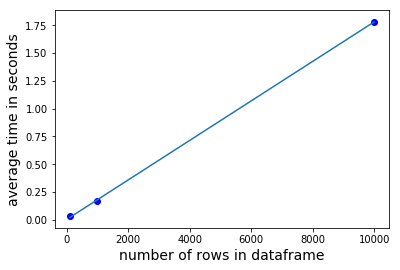

In [6]:
serial_x = list(serial_reslts.keys()) # list_of_row_size
serial_y = list(serial_reslts.values())
_=plt.scatter(serial_x,serial_y,color='blue')
_=plt.ylabel('average time in seconds',fontsize=14)
_=plt.xlabel('number of rows in dataframe',fontsize=14)

_=plt.plot(numpy.unique(serial_x), numpy.poly1d(numpy.polyfit(serial_x, serial_y, 1))(numpy.unique(serial_x))) # https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python

I'll walk through how I created that code.

In [7]:
row_count=10000
df = pandas.DataFrame(numpy.random.randint(0,1000,
                                           size=(row_count, 4)), 
                                           columns=list('ABCD'))

In [9]:
df.shape

(10000, 4)

In [10]:
df.head()

,A,B,C,D
0,353,685,779,816
1,298,205,379,766
2,16,241,56,985
3,975,327,135,837
4,495,305,202,414


Given a dataframe with numeric values, I create a simple function that can operate on the rows

In [11]:
def double_col_a(row):
    row_as_dict=dict(row)
    return row_as_dict['A']*2

To use the function, 

In [12]:
df['K'] = df.apply(double_col_a,axis=1)

The shape of the dataframe should be different because a new colum was added

In [14]:
df.shape

(10000, 5)

In [16]:
df.head()

,A,B,C,D,K
0,353,685,779,816,706
1,298,205,379,766,596
2,16,241,56,985,32
3,975,327,135,837,1950
4,495,305,202,414,990


In order to know how the function scales as the number of rows increases, I want to time that operation

<BR>
<BR>

To show the timing, I'll first reset the dataframe

In [17]:
df = pandas.DataFrame(numpy.random.randint(0,1000,
                                           size=(row_count, 4)), 
                                           columns=list('ABCD'))

The `time.time()` command show what time it is in seconds since 12:00 am on January 1, 1970. This specific time is called "epoch." For more on that, see 

https://en.wikipedia.org/wiki/Epoch_(reference_date)#Computing

https://en.wikipedia.org/wiki/Unix_time

https://stackoverflow.com/questions/2533563/why-are-dates-calculated-from-january-1st-1970/2533567

In [18]:
time.time()

1541995560.7251656

In [19]:
start_time = time.time()
df['K'] = df.apply(double_col_a,axis=1)
print(time.time() - start_time,'seconds')

1.764775037765503 seconds


Yay, a data point. Now we want to re-run that same test multiple times. 

In [20]:
number_of_tests=5
for test_indx in range(number_of_tests):
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    print(time.time() - start_time,'seconds')

2.220086097717285 seconds
2.153412103652954 seconds
1.9025068283081055 seconds
1.9645655155181885 seconds
2.107374906539917 seconds


To ensure a fair test, reset the dataframe being used in every experiment

In [21]:
number_of_tests=5
for test_indx in range(number_of_tests):
    df = pandas.DataFrame(numpy.random.randint(0,1000,
                                               size=(row_count, 4)), 
                                               columns=list('ABCD'))
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    print(time.time() - start_time,'seconds')

1.9699409008026123 seconds
2.520562171936035 seconds
1.6678578853607178 seconds
1.5631825923919678 seconds
1.9869599342346191 seconds


Rather than print the results of each test to screen, save to a list

In [22]:
number_of_tests=5
test_reslts=[]
for test_indx in range(number_of_tests):
    df = pandas.DataFrame(numpy.random.randint(0,1000,
                                               size=(row_count, 4)), 
                                               columns=list('ABCD'))
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    test_reslts.append(time.time() - start_time)

In [23]:
print(test_reslts)

[1.7116897106170654, 1.5411171913146973, 1.9707248210906982, 1.5667297840118408, 1.6390290260314941]


In [24]:
serial_reslts=sum(test_reslts)/number_of_tests

In [25]:
print(serial_reslts,'seconds')

1.6858581066131593 seconds


Put the calculation of the average at the end of the loop

In [26]:
number_of_tests=5
test_reslts=[]
for test_indx in range(number_of_tests):
    df = pandas.DataFrame(numpy.random.randint(0,1000,
                                               size=(row_count, 4)), 
                                               columns=list('ABCD'))
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    test_reslts.append(time.time() - start_time)
serial_reslts=sum(test_reslts)/number_of_tests

In [27]:
print(serial_reslts,'seconds')

1.6592490673065186 seconds


That was 5 tests of the timing for a dataframe where row_count=10000

In order to determine how the `double_col_a` function scales, we need to alter how many rows are in the dataframe

In [28]:
number_of_tests=5
list_of_row_size=[100, 1000, 10000]

Create a loop that runs tests for each of these row counts

Rather than store the test results to a scalar, store to a dictionary. The dictionary key is the number of rows in the dataframe.

In [29]:
serial_reslts={}
for row_count in list_of_row_size:
    test_reslts=[]
    for test_indx in range(number_of_tests):
        df = pandas.DataFrame(
                numpy.random.randint(0,1000,
                                     size=(row_count, 4)), 
                                     columns=list('ABCD'))
        start_time = time.time()
        df['K'] = df.apply(double_col_a,axis=1)
        test_reslts.append(time.time() - start_time)
    serial_reslts[row_count]=sum(test_reslts)/number_of_tests

In [30]:
print(serial_reslts)

{100: 0.0364654541015625, 1000: 0.1617799758911133, 10000: 1.730787467956543}


Now we can plot

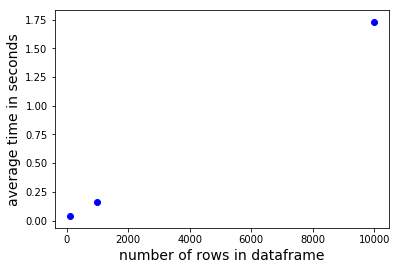

In [31]:
serial_x = list(serial_reslts.keys()) # list_of_row_size
serial_y = list(serial_reslts.values())
_=plt.scatter(serial_x,serial_y,color='blue')
_=plt.ylabel('average time in seconds',fontsize=14)
_=plt.xlabel('number of rows in dataframe',fontsize=14)

And to provide a guide for the reader's eye, add a linear fit

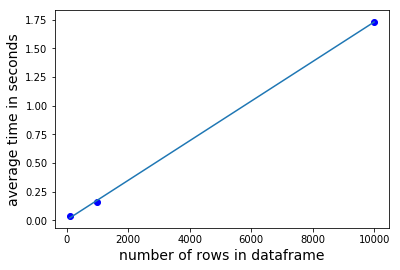

In [32]:
serial_x = list(serial_reslts.keys()) # list_of_row_size
serial_y = list(serial_reslts.values())
_=plt.scatter(serial_x,serial_y,color='blue')
_=plt.ylabel('average time in seconds',fontsize=14)
_=plt.xlabel('number of rows in dataframe',fontsize=14)

_=plt.plot(numpy.unique(serial_x), numpy.poly1d(numpy.polyfit(serial_x, serial_y, 1))(numpy.unique(serial_x))) # https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python